In [19]:
import pandas as pd
import re
articleDetails = pd.read_pickle('article_details.pkl')

In [20]:
# Remove article posted on 2015-01-03, because it has no details about vistors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2015-01-03"].index[0]])
# Remove article posted with the title of "Annual Seven-Up"
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Title'] == "Annual Seven-Up"].index[0]])
# Remove article posted on 2022-03-19, because it has no details about visitors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2022-03-19"].index[0]])

In [21]:
# Get visitor information: visitor count, visit count, page view count
def getVisitorNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("visitors", 1)[0])
    if pre_split_size != post_split_size:
        visitors = int(re.search(r'\d+', string.split("visitors", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        visitors = int(0)
    return visitors

def getVistTimesNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("times", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("times", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("visits", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("visits", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

def getPageViewNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("pages", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("pages", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("pageviews", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("pageviews", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

In [22]:
articleDetails['Visitors'] = articleDetails.apply(lambda row : getVisitorNumbers(row['Article Details']), axis = 1)
articleDetails['Visits'] = articleDetails.apply(lambda row : getVistTimesNumbers(row['Article Details']), axis = 1)
articleDetails['Page Visits'] = articleDetails.apply(lambda row : getPageViewNumbers(row['Article Details']), axis = 1)

# Remove article posted on 2010-11-06, because it has no details about visitors
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2010-11-06"].index[0]])

In [23]:
articleDetails.head()

,Date,Link,Title,Article Details,Post Time,List Links,Number of Links,Visitors,Visits,Page Visits
0,2022-06-04,https://order-order.com/2022/06/04/saturday-7-...,Saturday 7-Up,"This week 158,742 visitors visited 452,385 tim...",07:35,[EXCLUSIVE: Yvette Cooper’s Son Led Trans Righ...,7,158742,452385,699803
1,2022-05-28,https://order-order.com/2022/05/28/saturday-7-...,Saturday 7-Up,"This week 192,138 visitors visited 604,322 tim...",07:30,[Jess Phillips Investigation Concludes Multipl...,7,192138,604322,966584
2,2022-05-21,https://order-order.com/2022/05/21/saturday-7-...,Saturday 7-Up,"This week 201,390 visitors visited 582,067 tim...",07:30,[Andrew Rosindell’s Office Not Answering Queri...,7,201390,582067,944991
3,2022-05-07,https://order-order.com/2022/05/07/saturday-7-...,Saturday 7-Up,"This week 161,673 visitors visited 489,154 tim...",07:30,[LibDem Candidate’s Pornstar Sideline Revealed...,7,161673,489154,765033
4,2022-04-30,https://order-order.com/2022/04/30/saturday-7-...,Saturday 7-Up,"This week 185,091 visitors visited 548,002 tim...",07:30,"[Flashback: What They Said At the Time, READ I...",7,185091,548002,868770


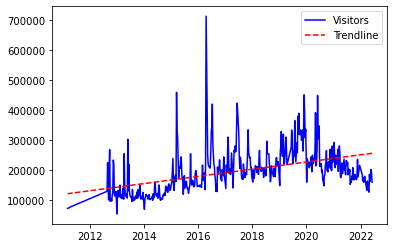

(255483.35486173257, 738310)
(120733.88548592478, 734201)
32.79373798389092


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

plt.plot(articleDetails['Date'], articleDetails['Visitors'], color='blue', label="Visitors")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visitors'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')


plt.legend()
plt.show()

print("(" + str(p(articleDetails['Date_num'][0])) + ", " + str(articleDetails['Date_num'][0]) + ")")
print("(" + str(p(articleDetails['Date_num'][476])) + ", " + str(articleDetails['Date_num'][476]) + ")")

print((p(articleDetails['Date_num'][0])-p(articleDetails['Date_num'][476]))/(articleDetails['Date_num'][0]-articleDetails['Date_num'][476]))